<a href="https://colab.research.google.com/github/roslanPaul/AF_Bank/blob/main/AF_MoussaDosso_RoslanNzambaNzamba_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd() # Current Working directory

'/content'

In [ ]:
# Create Working Directory if necessary

PROJECT_ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/Cours Data Analyse"

os.makedirs(PROJECT_ROOT_DIR, exist_ok=True)

# Change the current working directory

os.chdir(PROJECT_ROOT_DIR)

os.getcwd() # Current Working directory

'/content/drive/MyDrive/Colab Notebooks/Cours Data Analyse'

In [ ]:
# Create Sub Directories

path = "./models/"

os.makedirs(path, exist_ok=True)

path = "./data/"

os.makedirs(path, exist_ok=True)

path = "./images/"

os.makedirs(path, exist_ok=True)

path = "./library/"

os.makedirs(path, exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

In [ ]:
print("Telecharger le fichier csv:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

Telecharger le fichier csv:


Saving BankChurners.csv to BankChurners (23).csv


In [ ]:
# file_path = "/content/drive/MyDrive/Colab Notebooks/Cours Data Analyse/BankChurners (1).csv"

data = pd.read_csv(file_name)

In [ ]:
# Afficher les 5 premières lignes pour vérifier le chargement
print("Aperçu des 5 premières lignes du DataFrame :")
print(data.head())

Aperçu des 5 premières lignes du DataFrame :
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0     

Le fichier a été bien chargé, nous observons une variété de variables

L'identifiant de client unique n'aura aucune corrélation avec les taux d'attrition

In [ ]:
# Étape 1.2 : Vérifier la structure des données
print("\nInformations sur le DataFrame :")
print(data.info())

# Vérifier les dimensions (nombre de lignes et colonnes)
print(f"\nDimensions du DataFrame : {data.shape}")


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                          

In [ ]:
# Dénombrer le nombre de colonnes par type de données
print("\nNombre de colonnes par type de données:")
type_counts = data.dtypes.value_counts()
print(type_counts)

# Vérification du total
print(f"\nNombre total de colonnes: {len(data.columns)}")


Nombre de colonnes par type de données:
int64      10
float64     7
object      6
Name: count, dtype: int64

Nombre total de colonnes: 23


In [ ]:
# Identifier les colonnes qualitatives et quantitatives
qualitative_cols = data.select_dtypes(include=['object', 'category']).columns
quantitative_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Compter le nombre de colonnes de chaque type
num_qualitative_cols = len(qualitative_cols)
num_quantitative_cols = len(quantitative_cols)

# Afficher les résultats
print(f"\nNombre de colonnes qualitatives: {num_qualitative_cols}")
print("Noms des colonnes qualitatives:", list(qualitative_cols))

print(f"\nNombre de colonnes quantitatives: {num_quantitative_cols}")
print("Noms des colonnes quantitatives:", list(quantitative_cols))



Nombre de colonnes qualitatives: 6
Noms des colonnes qualitatives: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Nombre de colonnes quantitatives: 17
Noms des colonnes quantitatives: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [ ]:
# Étape 1.3 : Vérifier les valeurs manquantes ou cellules vide
print("\nNombre de valeurs manquantes par colonne :")
print(data.isnull().sum())


Nombre de valeurs manquantes par colonne :
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Inco

Aucune cellule n'est vide !

In [ ]:
# Étape 1.4 : Supprimer les doublons (basé sur CLIENTNUM)
data = data.drop_duplicates(subset='CLIENTNUM', keep='first')
print(f"\nDimensions après suppression des doublons : {data.shape}")


Dimensions après suppression des doublons : (10127, 23)


In [ ]:
# Vérifier le nombre de doublons dans le DataFrame
print("\nNombre de doublons:")
duplicates_count = data.duplicated().sum()
print(f"Le DataFrame contient {duplicates_count} lignes dupliquées.")

# Pour voir le pourcentage de doublons
total_rows = len(data)
duplicate_percentage = (duplicates_count / total_rows) * 100
print(f"Pourcentage de doublons: {duplicate_percentage:.2f}%")


Nombre de doublons:
Le DataFrame contient 0 lignes dupliquées.
Pourcentage de doublons: 0.00%


In [ ]:
# Étape 1.5 : Nettoyage des données
# Supprimer les colonnes inutiles (Naive Bayes Classifier, car ce sont des outputs prédéfinis)
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
data = data.drop(columns=columns_to_drop, errors='ignore')

**Gestion des colonnes à caractère qualitatif**

In [ ]:
# Vérifier les valeurs uniques des colonnes qualitatives
qualitative_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
print("\nValeurs uniques des colonnes qualitatives :")
for col in qualitative_cols:
    print(f"{col}: {data[col].unique()}")


Valeurs uniques des colonnes qualitatives :
Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
# Gérer les valeurs 'Unknown' comme des valeurs manquantes
data[qualitative_cols] = data[qualitative_cols].replace('Unknown', np.nan)

# Afficher à nouveau les valeurs manquantes après remplacement
print("\nNombre de valeurs manquantes après remplacement des 'Unknown' :")
print(data.isnull().sum())


Nombre de valeurs manquantes après remplacement des 'Unknown' :
CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [ ]:
# Calcule le mode des colonnes
for col in ["Education_Level", "Marital_Status", "Income_Category"]:
  mode_value = data[col].mode()[0]  # Get the first mode in case of multiple modes
  print(f"Mode of {col}: {mode_value}")


Mode of Education_Level: Graduate
Mode of Marital_Status: Married
Mode of Income_Category: Less than $40K


In [ ]:
# Imputer les valeurs manquantes pour les colonnes qualitatives (par la mode)
for col in qualitative_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

# Vérifier une dernière fois les valeurs manquantes
print("\nNombre de valeurs manquantes après imputation :")
print(data.isnull().sum())


Nombre de valeurs manquantes après imputation :
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


<ipython-input-19-9836a105b5c1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [ ]:
# Étape 1.6 : Conversion des types de données
# Convertir les colonnes numériques en float (si elles ne le sont pas déjà)
numeric_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Forcer la conversion en float64
    data[col] = data[col].astype(float)

# Vérifier les types de données après conversion
print("\nTypes de données après conversion :")
print(data.dtypes)


Types de données après conversion :
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [ ]:
# Étape 1.7 : Encoder les variables qualitatives
# Utiliser One-Hot Encoding pour les colonnes catégoriques
data_encoded = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Convertir Attrition_Flag en binaire (0 pour Existing, 1 pour Attrited)
data_encoded['Attrition_Flag'] = data_encoded['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Afficher les colonnes du DataFrame encodé
print("\nColonnes du DataFrame après encodage :")
print(data_encoded.columns)



Colonnes du DataFrame après encodage :
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


In [ ]:
# Étape 1.8 : Statistiques descriptives initiales sur variables quantitative
print("\nStatistiques descriptives des colonnes numériques :")
print(data_encoded[numeric_cols].describe())

# Sauvegarder le DataFrame prétraité pour les étapes suivantes
data_encoded.to_csv('BankChurners_preprocessed.csv', index=False)
print("\nDataFrame prétraité sauvegardé sous 'BankChurners_preprocessed.csv'")

# Afficher un message de confirmation
print("\nÉtape 1 terminée : Données chargées, nettoyées et prétraitées avec succès !")


Statistiques descriptives des colonnes numériques :
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.0000

In [ ]:
# Configurer le style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

In [ ]:
# Étape 2.1 : Charger le DataFrame prétraité
# Si vous avez exécuté l'Étape 1, utilisez le fichier prétraité
# Sinon, rechargez et prétraitez rapidement BankChurners.csv
try:
    data = pd.read_csv('BankChurners_preprocessed.csv')
    print("DataFrame prétraité chargé avec succès.")
except FileNotFoundError:
    print("Fichier prétraité non trouvé. Rechargement et prétraitement de BankChurners.csv...")
    data = pd.read_csv('BankChurners.csv')

    # Prétraitement rapide (récap de l'Étape 1)
    columns_to_drop = [
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ]
    data = data.drop(columns=columns_to_drop, errors='ignore')
    data = data.drop_duplicates(subset='CLIENTNUM', keep='first')

    qualitative_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
    data[qualitative_cols] = data[qualitative_cols].replace('Unknown', np.nan)
    for col in qualitative_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

    numeric_cols = [
        'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]
    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
    data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    data.to_csv('BankChurners_preprocessed.csv', index=False)
    print("Prétraitement terminé. DataFrame sauvegardé.")

DataFrame prétraité chargé avec succès.


In [ ]:
# Afficher les colonnes pour vérification
print("\nColonnes du DataFrame :")
print(data.columns)


Colonnes du DataFrame :
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


In [ ]:
# Étape 2.2 : Séparer les variables quantitatives et qualitatives
quantitative_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
qualitative_cols = ['Attrition_Flag'] + [col for col in data.columns if col.startswith(('Gender_', 'Education_Level_', 'Marital_Status_', 'Income_Category_', 'Card_Category_'))]

print("\nVariables quantitatives :", quantitative_cols)
print("Variables qualitatives :", qualitative_cols)


Variables quantitatives : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Variables qualitatives : ['Attrition_Flag', 'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Marital_Status_Married', 'Marital_Status_Single', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']


In [ ]:
# Variables quantitatives et qualitatives déjà identifiées dans le code précédent.
# On affiche les résultats pour plus de clarté

quantitative_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
qualitative_cols = ['Attrition_Flag'] + [col for col in data.columns if col.startswith(('Gender_', 'Education_Level_', 'Marital_Status_', 'Income_Category_', 'Card_Category_'))]

num_quantitative_cols = len(quantitative_cols)
num_qualitative_cols = len(qualitative_cols)

print(f"Nombre de variables quantitatives: {num_quantitative_cols}")
print(f"Nombre de variables qualitatives: {num_qualitative_cols}")


Nombre de variables quantitatives: 14
Nombre de variables qualitatives: 16


In [ ]:
# Étape 2.3 : Calculer les statistiques descriptives pour les variables quantitatives
stats = pd.DataFrame(index=quantitative_cols, columns=['Mean', 'Median', 'Variance', 'Std', 'Skewness', 'Kurtosis', 'Min', 'Max'])
for col in quantitative_cols:
    stats.loc[col, 'Mean'] = data[col].mean()
    stats.loc[col, 'Median'] = data[col].median()
    stats.loc[col, 'Variance'] = data[col].var()
    stats.loc[col, 'Std'] = data[col].std()
    stats.loc[col, 'Skewness'] = skew(data[col].dropna())
    stats.loc[col, 'Kurtosis'] = kurtosis(data[col].dropna(), fisher=True)
    stats.loc[col, 'Min'] = data[col].min()
    stats.loc[col, 'Max'] = data[col].max()

print("\nStatistiques descriptives des variables quantitatives :")
print(stats)


Statistiques descriptives des variables quantitatives :
                                 Mean  Median         Variance          Std  \
Customer_Age                 46.32596    46.0        64.269307     8.016814   
Dependent_count              2.346203     2.0         1.687163     1.298908   
Months_on_book              35.928409    36.0        63.782846     7.986416   
Total_Relationship_Count      3.81258     4.0         2.416184     1.554408   
Months_Inactive_12_mon       2.341167     2.0         1.021358     1.010622   
Contacts_Count_12_mon        2.455317     2.0         1.223734     1.106225   
Credit_Limit              8631.953698  4549.0  82605860.997641   9088.77665   
Total_Revolving_Bal       1162.814061  1276.0    664204.356595   814.987335   
Avg_Open_To_Buy           7469.139637  3474.0  82640559.654155  9090.685324   
Total_Amt_Chng_Q4_Q1         0.759941   0.736         0.048052     0.219207   
Total_Trans_Amt           4404.086304  3899.0  11540487.165373  3397.12925

Dans les prochaines etapes les valeurs abberrantes n'ont pas ete supprimees aussitot pour plusieurs raisons :

*   Dans un contexte bancaire, les valeurs aberrantes peuvent correspondre a des clients importants : Supprimer ces valeurs pourrait exclure des profils clés pour la fidélisation ou la segmentation.
*   La standardisation (Étapes 4 et 5) réduit l'impact des aberrantes en les mettant à l'échelle.
*   Les Étapes 1 à 5 sont exploratoires. Conserver les aberrantes permet de comprendre leur impact sur les corrélations, l'ACP, et le clustering avant de décider d'une action corrective (ex. dans l'Étape 6 : Modélisation).

In [ ]:
# Étape 2.4 : Identifier les valeurs aberrantes (règle IQR) condition de valeur aberante ?
outliers = {}
for col in quantitative_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    outliers[col] = outlier_count

print("\nNombre de valeurs aberrantes par variable quantitative (règle IQR) :")
for col, count in outliers.items():
    print(f"{col}: {count}")


Nombre de valeurs aberrantes par variable quantitative (règle IQR) :
Customer_Age: 2
Dependent_count: 0
Months_on_book: 386
Total_Relationship_Count: 0
Months_Inactive_12_mon: 331
Contacts_Count_12_mon: 629
Credit_Limit: 984
Total_Revolving_Bal: 0
Avg_Open_To_Buy: 963
Total_Amt_Chng_Q4_Q1: 396
Total_Trans_Amt: 896
Total_Trans_Ct: 2
Total_Ct_Chng_Q4_Q1: 394
Avg_Utilization_Ratio: 0


Une fois les valeurs aberantes identifier, ou est la suite ? Je pense qu'il faut soit les extraire soit les remplacées par la moyenne

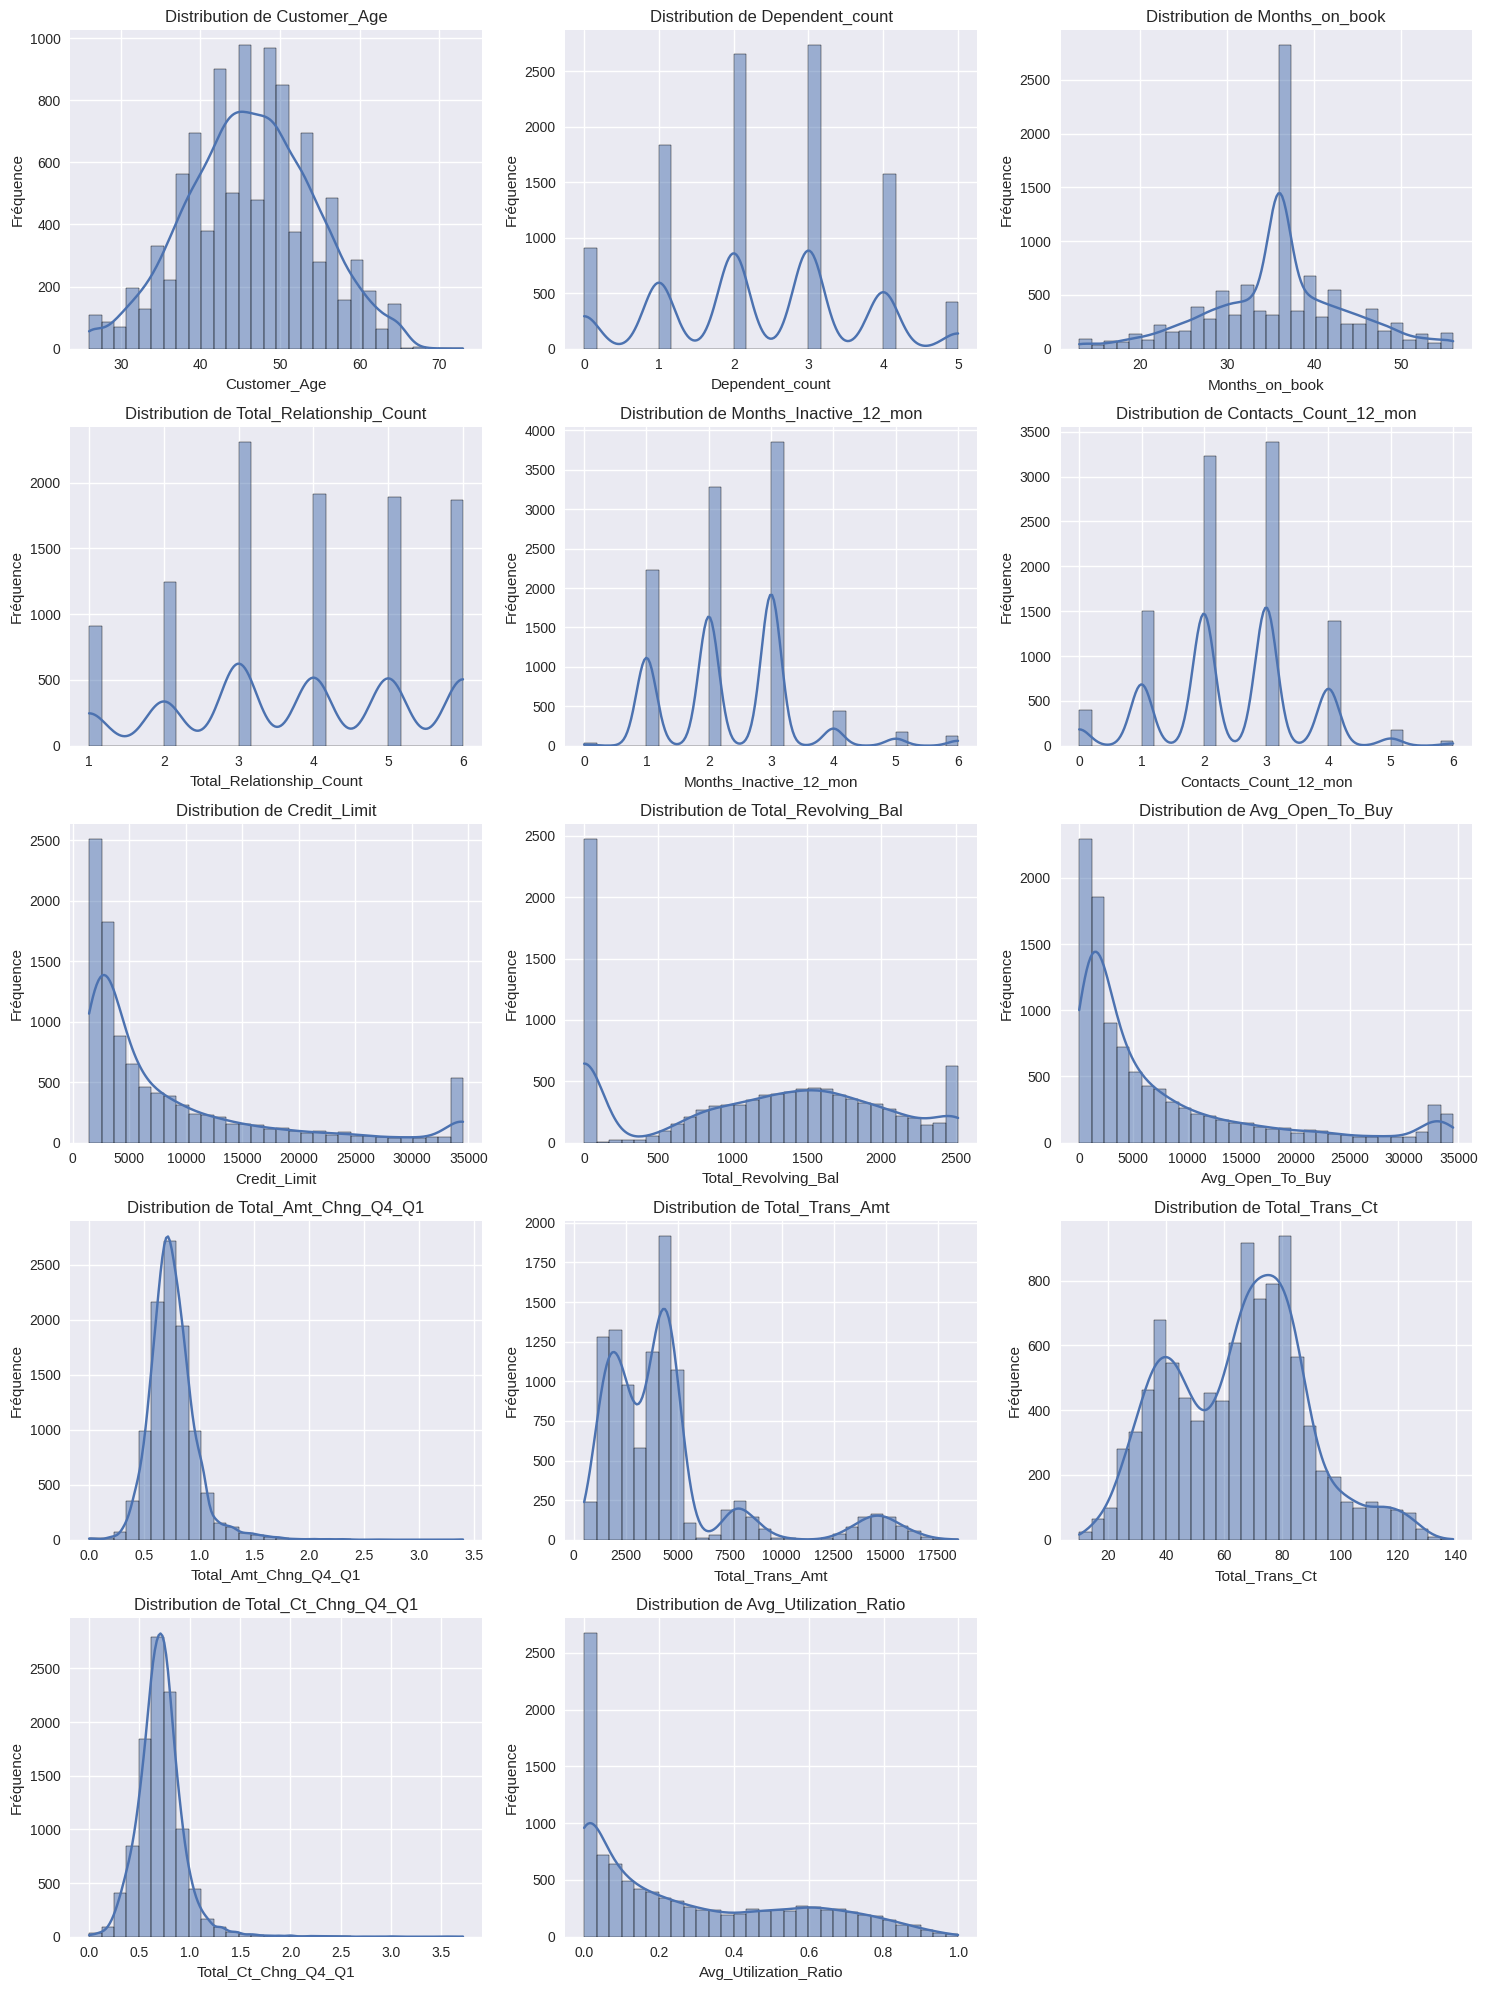

Histogrammes sauvegardés sous 'quantitative_histograms.png'.


In [ ]:
# Étape 2.5 : Visualiser les distributions des variables quantitatives (histogrammes)
path_images = './images/'
plt.figure(figsize=(15, 20))
for i, col in enumerate(quantitative_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.savefig(path_images + 'quantitative_histograms.png')
plt.show()
print("Histogrammes sauvegardés sous 'quantitative_histograms.png'.")

**Statistique des variables qualitatives**

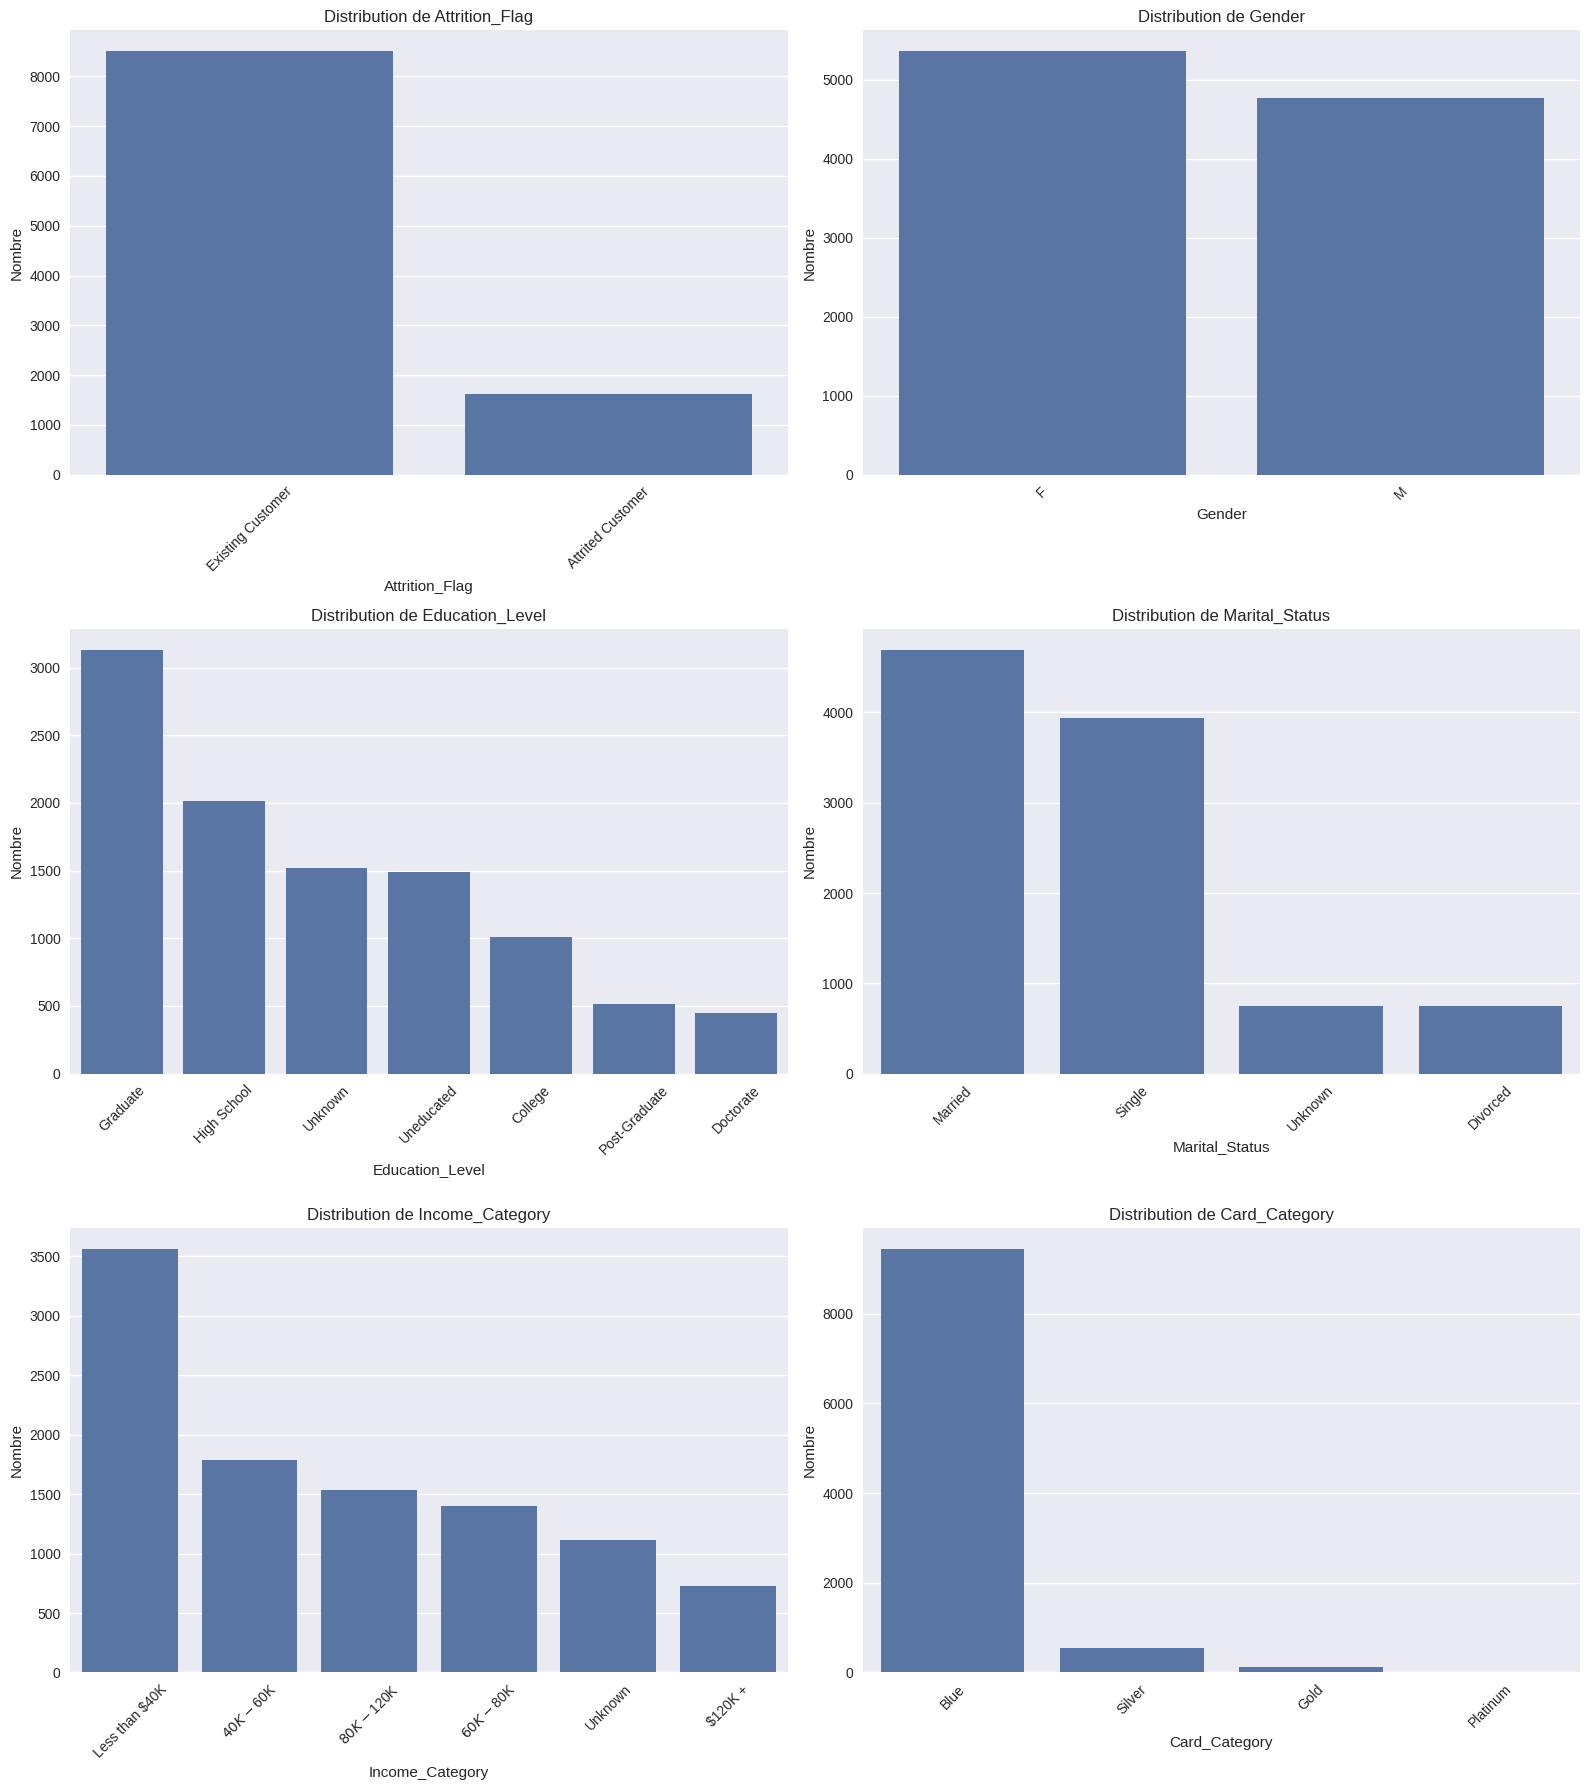

Diagrammes en barres sauvegardés sous 'qualitative_barcharts.png'.


In [ ]:
# Étape 2.6 : Visualiser les distributions des variables qualitatives (diagrammes en barres)
# Sélectionner quelques variables qualitatives clés (non encodées pour lisibilité)
path_images = './images/'
original_qual_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
if not data.filter(original_qual_cols).empty:
    data_original = pd.read_csv('BankChurners.csv')[original_qual_cols]
    plt.figure(figsize=(16, 18))
    for i, col in enumerate(original_qual_cols, 1):
        plt.subplot(3, 2, i)
        sns.countplot(data=data_original, x=col, order=data_original[col].value_counts().index)
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Nombre')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('qualitative_barcharts.png')
    plt.show()
    print("Diagrammes en barres sauvegardés sous 'qualitative_barcharts.png'.")
else:
    print("Variables qualitatives originales non disponibles. Utilisation des variables encodées.")
    plt.figure(figsize=(16, 18))
    for i, col in enumerate(qualitative_cols[:6], 1):  # Limiter à 6 pour lisibilité
        plt.subplot(3, 2, i)
        sns.countplot(data=data, x=col)
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Nombre')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(path_images + 'qualitative_barcharts_encoded.png')
    plt.show()
    print("Diagrammes en barres (encodés) sauvegardés sous 'qualitative_barcharts_encoded.png'.")

Quelle est l'utilité de ce resumé

L'Étape 2.7 (résumé des types de variables) est utile pour :

*   Clarifier la structure du DataFrame après prétraitement et encodage.
*   Préparer les analyses (corrélation, ACP, clustering, modélisation) en distinguant quantitatives et qualitatives.
*   Valider l'encodage (ex. nombre de colonnes qualitatives générées).
*   Documenter pour les collaborateurs, parties prenantes, et le rapport final.
*   Détecter les erreurs (ex. variable manquante ou mal classée).
*   Supporter les étapes avancées (ex. tableau de bord, analyse causale).

In [ ]:
# Étape 2.7 : Résumer les types de variables
variable_types = {
    'Quantitative': quantitative_cols,
    'Qualitative': qualitative_cols
}
print("\nRésumé des types de variables :")
print(f"Quantitatives ({len(quantitative_cols)}): {', '.join(quantitative_cols)}")
print(f"Qualitatives ({len(qualitative_cols)}): {', '.join(qualitative_cols)}")


Résumé des types de variables :
Quantitatives (14): Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
Qualitatives (16): Attrition_Flag, Gender_M, Education_Level_Doctorate, Education_Level_Graduate, Education_Level_High School, Education_Level_Post-Graduate, Education_Level_Uneducated, Marital_Status_Married, Marital_Status_Single, Income_Category_$40K - $60K, Income_Category_$60K - $80K, Income_Category_$80K - $120K, Income_Category_Less than $40K, Card_Category_Gold, Card_Category_Platinum, Card_Category_Silver


In [ ]:
# Étape 2.8 : Sauvegarder les résultats
path_data = './data/'
stats.to_csv(path_data + 'univariate_stats.csv')
print("\nStatistiques descriptives sauvegardées sous 'univariate_stats.csv'.")
print("\nÉtape 2 terminée : Analyse univariée effectuée avec succès !")


Statistiques descriptives sauvegardées sous 'univariate_stats.csv'.

Étape 2 terminée : Analyse univariée effectuée avec succès !


In [ ]:
# Étape 3.1 : Charger le DataFrame prétraité
try:
    data = pd.read_csv('BankChurners_preprocessed.csv')
    print("DataFrame prétraité chargé avec succès.")
except FileNotFoundError:
    print("Fichier prétraité non trouvé. Rechargement et prétraitement de BankChurners.csv...")
    data = pd.read_csv('BankChurners.csv')

    # Prétraitement rapide (récap de l'Étape 1)
    columns_to_drop = [
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ]
    data = data.drop(columns=columns_to_drop, errors='ignore')
    data = data.drop_duplicates(subset='CLIENTNUM', keep='first')

    qualitative_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
    data[qualitative_cols] = data[qualitative_cols].replace('Unknown', np.nan)
    for col in qualitative_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

    numeric_cols = [
        'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]
    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
    data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    data.to_csv('BankChurners_preprocessed.csv', index=False)
    print("Prétraitement terminé. DataFrame sauvegardé.")

DataFrame prétraité chargé avec succès.


In [ ]:
# Étape 3.2 : Séparer les variables quantitatives et qualitatives
quantitative_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
# Inclure uniquement les variables qualitatives originales (avant encodage) pour les tests chi²
original_qual_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Charger les données originales pour les variables qualitatives non encodées
data_original = pd.read_csv('BankChurners.csv')[['Attrition_Flag'] + original_qual_cols]
data_original['Attrition_Flag'] = data_original['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data_original[original_qual_cols] = data_original[original_qual_cols].replace('Unknown', np.nan)
for col in original_qual_cols:
    if data_original[col].isnull().sum() > 0:
        data_original[col].fillna(data_original[col].mode()[0], inplace=True)

print("\nVariables quantitatives :", quantitative_cols)
print("Variables qualitatives (originales) :", original_qual_cols)


Variables quantitatives : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Variables qualitatives (originales) : ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


<ipython-input-35-90d392574b72>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_original[col].fillna(data_original[col].mode()[0], inplace=True)


Analyse des corelations des variables quantitatives

In [ ]:
# Étape 3.3 : Calculer la matrice de corrélation pour les variables quantitatives
# Standardiser les données pour calculer la corrélation (X_c = matrice centrée-réduite)
X = data[quantitative_cols].dropna()
X_c = (X - X.mean()) / X.std()
correlation_matrix = X_c.T @ X_c / len(X_c)
print("\nMatrice de corrélation (calculée manuellement) :")
print(correlation_matrix)

# Utiliser pandas pour confirmation
corr_matrix_pandas = data[quantitative_cols].corr()
print("\nMatrice de corrélation (via pandas) :")
print(corr_matrix_pandas)


Matrice de corrélation (calculée manuellement) :
                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  0.999901        -0.122242        0.788834   
Dependent_count              -0.122242         0.999901       -0.103052   
Months_on_book                0.788834        -0.103052        0.999901   
Total_Relationship_Count     -0.010930        -0.039073       -0.009202   
Months_Inactive_12_mon        0.054356        -0.010767        0.074156   
Contacts_Count_12_mon        -0.018450        -0.040501       -0.010773   
Credit_Limit                  0.002476         0.068058        0.007506   
Total_Revolving_Bal           0.014778        -0.002688        0.008622   
Avg_Open_To_Buy               0.001151         0.068285        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062036        -0.035436       -0.048954   
Total_Trans_Amt              -0.046442         0.025044       -0.038587   
Total_Trans_Ct               -0.067090         0.0

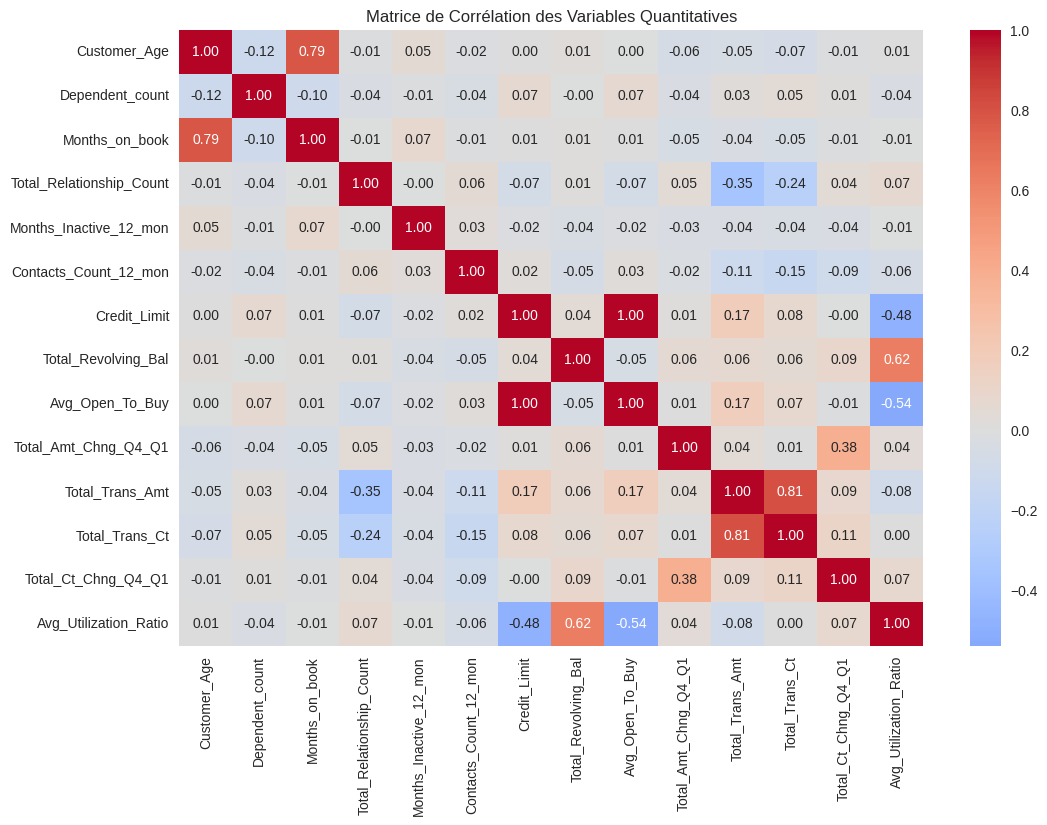

Heatmap sauvegardée sous 'correlation_heatmap.png'.


In [ ]:
# Visualiser la matrice de corrélation (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pandas, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation des Variables Quantitatives')
plt.savefig(path_images + 'correlation_heatmap.png')
plt.show()
print("Heatmap sauvegardée sous 'correlation_heatmap.png'.")

In [ ]:
# Étape 3.4 : Tests statistiques (Chi² pour qualitatives, ANOVA pour quantitatives)
# Chi² : Association entre Attrition_Flag et variables qualitatives
chi2_results = {}
for col in original_qual_cols:
    contingency_table = pd.crosstab(data_original['Attrition_Flag'], data_original[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p_value, 'DoF': dof}

print("\nRésultats des tests Chi² (Attrition_Flag vs variables qualitatives) :")
for col, result in chi2_results.items():
    print(f"{col}: Chi2 = {result['Chi2']:.2f}, p-value = {result['p-value']:.4f}, DoF = {result['DoF']}")


Résultats des tests Chi² (Attrition_Flag vs variables qualitatives) :
Gender: Chi2 = 13.87, p-value = 0.0002, DoF = 1
Education_Level: Chi2 = 11.26, p-value = 0.0464, DoF = 5
Marital_Status: Chi2 = 3.95, p-value = 0.1386, DoF = 2
Income_Category: Chi2 = 12.75, p-value = 0.0126, DoF = 4
Card_Category: Chi2 = 2.23, p-value = 0.5252, DoF = 3


Analyse sur les variables qualitatives

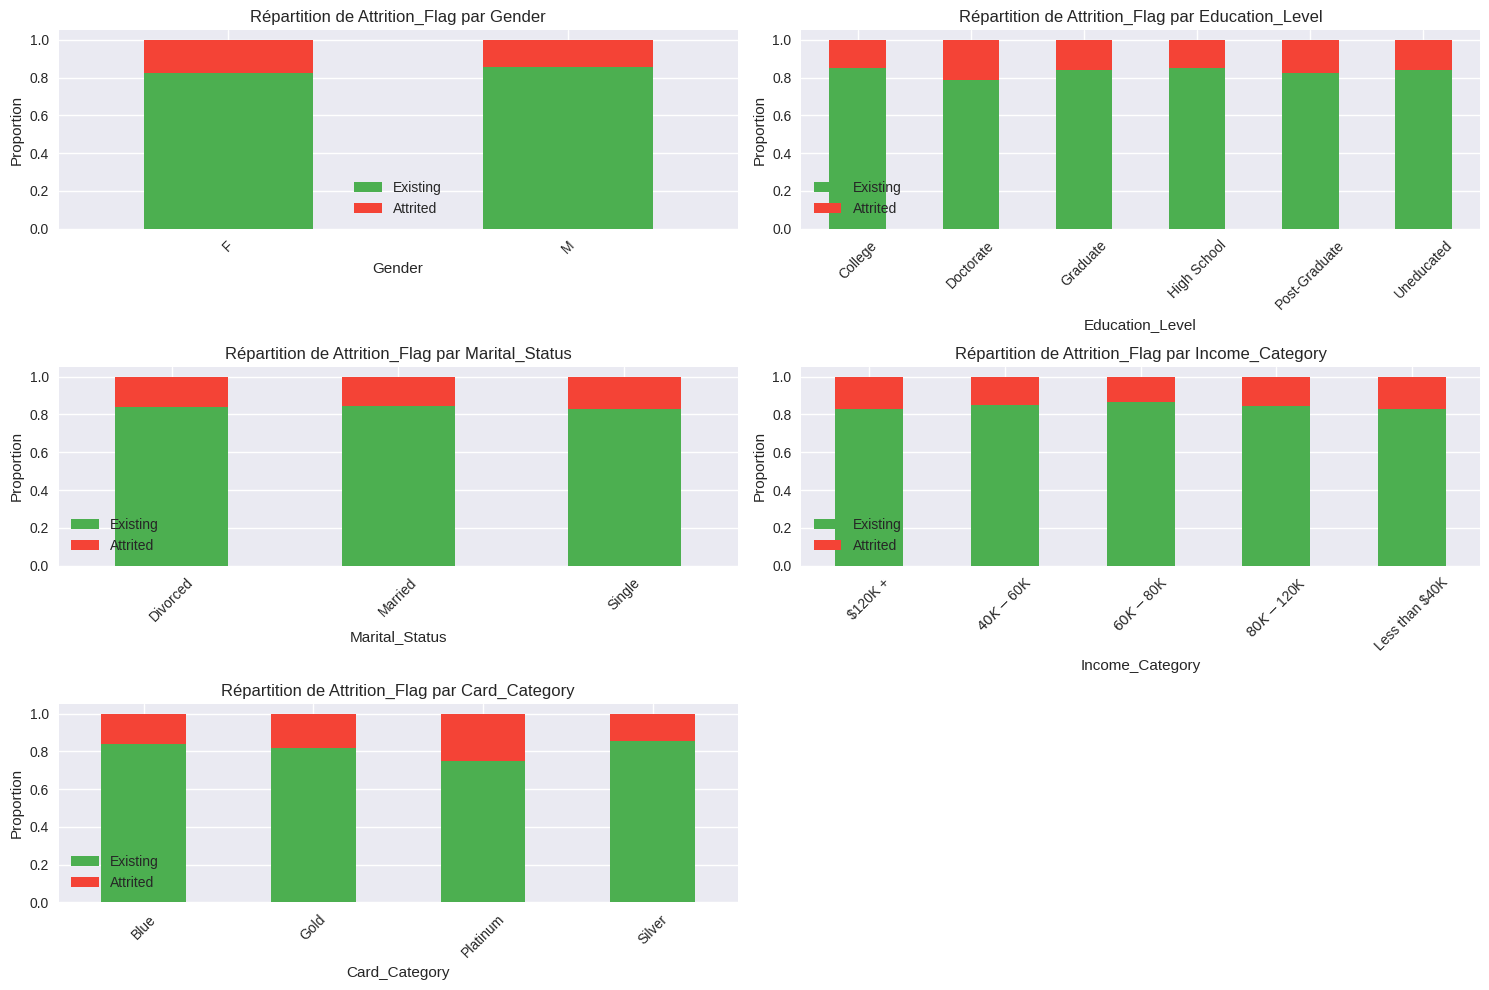

Diagrammes en barres empilées sauvegardés sous 'crosstab_barcharts.png'.


In [ ]:
# Visualiser les tableaux croisés (diagrammes en barres empilées)
plt.figure(figsize=(15, 10))
for i, col in enumerate(original_qual_cols, 1):
    plt.subplot(3, 2, i)
    crosstab = pd.crosstab(data_original[col], data_original['Attrition_Flag'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#4CAF50', '#F44336'])
    plt.title(f'Répartition de Attrition_Flag par {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(['Existing', 'Attrited'])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(path_images + 'crosstab_barcharts.png')
plt.show()
print("Diagrammes en barres empilées sauvegardés sous 'crosstab_barcharts.png'.")

In [ ]:
# ANOVA : Comparer les moyennes des variables quantitatives par Attrition_Flag
anova_results = {}
for col in quantitative_cols:
    groups = [data[data['Attrition_Flag'] == i][col].dropna() for i in [0, 1]]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {'F-stat': f_stat, 'p-value': p_value}

print("\nRésultats des tests ANOVA (Attrition_Flag vs variables quantitatives) :")
for col, result in anova_results.items():
    print(f"{col}: F-stat = {result['F-stat']:.2f}, p-value = {result['p-value']:.4f}")


Résultats des tests ANOVA (Attrition_Flag vs variables quantitatives) :
Customer_Age: F-stat = 3.36, p-value = 0.0670
Dependent_count: F-stat = 3.65, p-value = 0.0560
Months_on_book: F-stat = 1.90, p-value = 0.1684
Total_Relationship_Count: F-stat = 233.07, p-value = 0.0000
Months_Inactive_12_mon: F-stat = 240.91, p-value = 0.0000
Contacts_Count_12_mon: F-stat = 441.87, p-value = 0.0000
Credit_Limit: F-stat = 5.77, p-value = 0.0163
Total_Revolving_Bal: F-stat = 752.70, p-value = 0.0000
Avg_Open_To_Buy: F-stat = 0.00, p-value = 0.9771
Total_Amt_Chng_Q4_Q1: F-stat = 176.96, p-value = 0.0000
Total_Trans_Amt: F-stat = 296.23, p-value = 0.0000
Total_Trans_Ct: F-stat = 1620.12, p-value = 0.0000
Total_Ct_Chng_Q4_Q1: F-stat = 930.08, p-value = 0.0000
Avg_Utilization_Ratio: F-stat = 332.88, p-value = 0.0000


<ipython-input-42-e03e90b67940>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=data, palette=['#4CAF50', '#F44336'])
<ipython-input-42-e03e90b67940>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=data, palette=['#4CAF50', '#F44336'])
<ipython-input-42-e03e90b67940>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y=col, data=data, palette=['#4CAF50', '#F44336'])
<ipython-input-42-e03e90b67940>:5: FutureWarning: 

Passing `palette` without assigning `hue` 

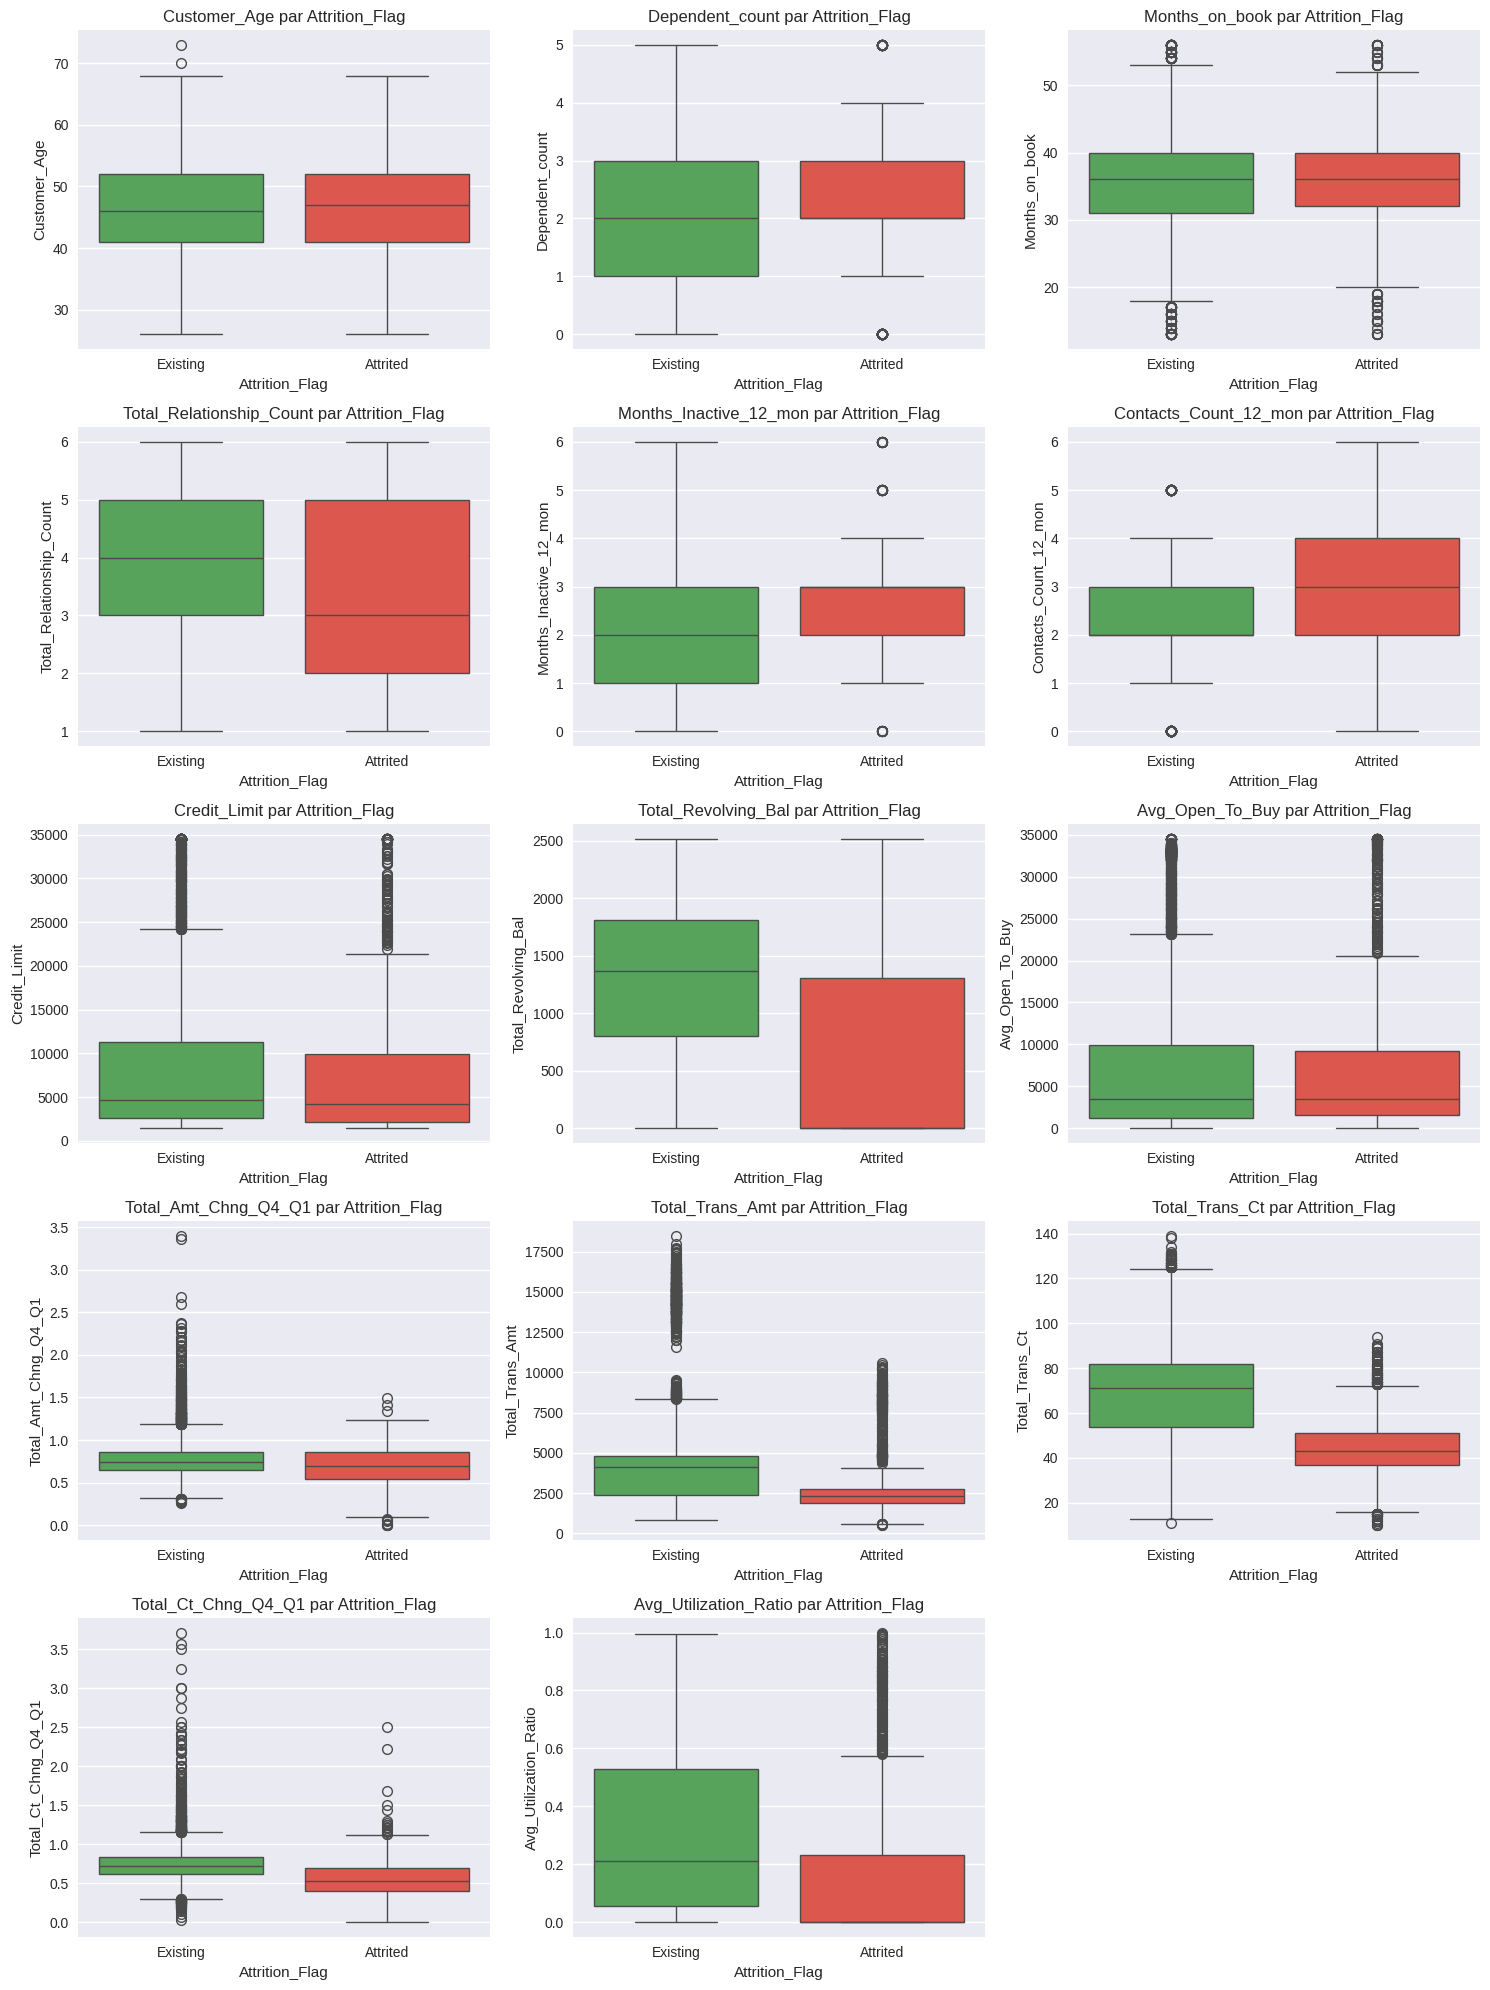

Boxplots sauvegardés sous 'boxplots_by_attrition.png'.


In [ ]:
# Étape 3.5 : Visualiser les relations quantitatives (boxplots par Attrition_Flag)      Ce code ne marche pas!!!!!
plt.figure(figsize=(15, 20))
for i, col in enumerate(quantitative_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='Attrition_Flag', y=col, data=data, palette=['#4CAF50', '#F44336'])
    plt.title(f'{col} par Attrition_Flag')
    plt.xlabel('Attrition_Flag')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Existing', 'Attrited'])
plt.tight_layout()
plt.savefig(path_images + 'boxplots_by_attrition.png')
plt.show()
print("Boxplots sauvegardés sous 'boxplots_by_attrition.png'.")

In [ ]:
# Étape 3.6 : Sauvegarder les résultats
corr_matrix_pandas.to_csv(path_data + 'correlation_matrix.csv')
chi2_df = pd.DataFrame(chi2_results).T
chi2_df.to_csv(path_data + 'chi2_results.csv')
anova_df = pd.DataFrame(anova_results).T
anova_df.to_csv(path_data + 'anova_results.csv')

print("\nRésultats sauvegardés :")
print("- Matrice de corrélation : 'correlation_matrix.csv'")
print("- Résultats Chi² : 'chi2_results.csv'")
print("- Résultats ANOVA : 'anova_results.csv'")
print("\nÉtape 3 terminée : Analyse bivariée et multivariée effectuée avec succès !")


Résultats sauvegardés :
- Matrice de corrélation : 'correlation_matrix.csv'
- Résultats Chi² : 'chi2_results.csv'
- Résultats ANOVA : 'anova_results.csv'

Étape 3 terminée : Analyse bivariée et multivariée effectuée avec succès !


In [ ]:
# Étape 4.1 : Charger le DataFrame prétraité
try:
    data = pd.read_csv('BankChurners_preprocessed.csv')
    print("DataFrame prétraité chargé avec succès.")
except FileNotFoundError:
    print("Fichier prétraité non trouvé. Rechargement et prétraitement de BankChurners.csv...")
    data = pd.read_csv('BankChurners.csv')

    # Prétraitement rapide (récap de l'Étape 1)
    columns_to_drop = [
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ]
    data = data.drop(columns=columns_to_drop, errors='ignore')
    data = data.drop_duplicates(subset='CLIENTNUM', keep='first')

    qualitative_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
    data[qualitative_cols] = data[qualitative_cols].replace('Unknown', np.nan)
    for col in qualitative_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

    numeric_cols = [
        'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]
    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
    data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    data.to_csv('BankChurners_preprocessed.csv', index=False)
    print("Prétraitement terminé. DataFrame sauvegardé.")

DataFrame prétraité chargé avec succès.


In [ ]:
# Étape 4.2 : Sélectionner les variables quantitatives pour l'ACP
quantitative_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Supprimer les lignes avec des valeurs manquantes pour l'ACP
data_acp = data[quantitative_cols].dropna()
print(f"\nDimensions des données pour l'ACP : {data_acp.shape}")


Dimensions des données pour l'ACP : (10127, 14)


In [ ]:
# Étape 4.3 : Standardiser les données (centrées-réduites)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_acp)
X_scaled_df = pd.DataFrame(X_scaled, columns=quantitative_cols)

In [ ]:
# Étape 4.4 : Calculer la matrice de variance-covariance
# Formule : V = (1/n) * X_c^T * X_c
n = X_scaled.shape[0]
var_cov_matrix = (X_scaled.T @ X_scaled) / n
var_cov_matrix_df = pd.DataFrame(var_cov_matrix, index=quantitative_cols, columns=quantitative_cols)
print("\nMatrice de variance-covariance :")
print(var_cov_matrix_df)


Matrice de variance-covariance :
                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.0

In [ ]:
# Étape 4.5 : Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nVariance expliquée par chaque composante :")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print("\nVariance expliquée cumulée :")
for i, cum_ratio in enumerate(cumulative_variance):
    print(f"PC1 à PC{i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")

# Choisir le nombre de composantes pour conserver 80-90% de la variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"\nNombre de composantes pour 80% de variance : {n_components}")


Variance expliquée par chaque composante :
PC1: 0.1834 (18.34%)
PC2: 0.1461 (14.61%)
PC3: 0.1284 (12.84%)
PC4: 0.1033 (10.33%)
PC5: 0.0888 (8.88%)
PC6: 0.0717 (7.17%)
PC7: 0.0704 (7.04%)
PC8: 0.0646 (6.46%)
PC9: 0.0576 (5.76%)
PC10: 0.0428 (4.28%)
PC11: 0.0158 (1.58%)
PC12: 0.0151 (1.51%)
PC13: 0.0120 (1.20%)
PC14: 0.0000 (0.00%)

Variance expliquée cumulée :
PC1 à PC1: 0.1834 (18.34%)
PC1 à PC2: 0.3295 (32.95%)
PC1 à PC3: 0.4579 (45.79%)
PC1 à PC4: 0.5612 (56.12%)
PC1 à PC5: 0.6500 (65.00%)
PC1 à PC6: 0.7217 (72.17%)
PC1 à PC7: 0.7920 (79.20%)
PC1 à PC8: 0.8566 (85.66%)
PC1 à PC9: 0.9143 (91.43%)
PC1 à PC10: 0.9571 (95.71%)
PC1 à PC11: 0.9730 (97.30%)
PC1 à PC12: 0.9880 (98.80%)
PC1 à PC13: 1.0000 (100.00%)
PC1 à PC14: 1.0000 (100.00%)

Nombre de composantes pour 80% de variance : 8


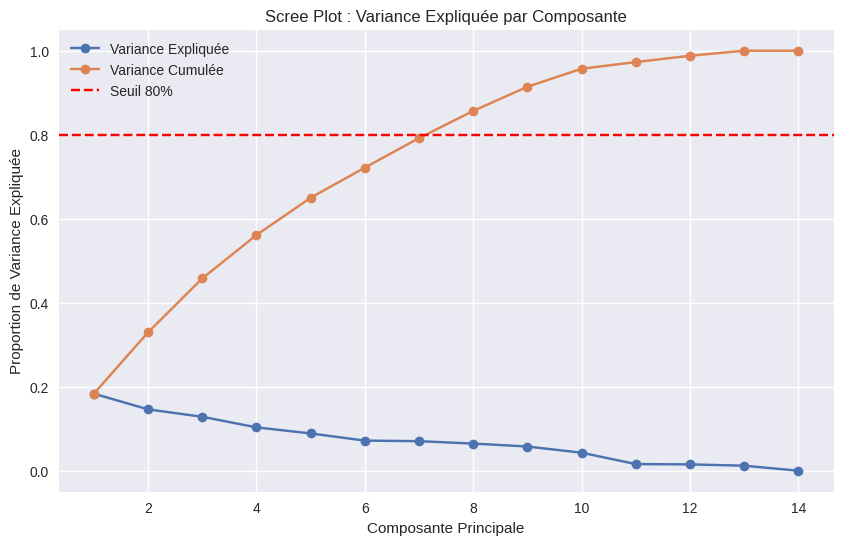

Scree plot sauvegardé sous 'scree_plot.png'.


In [ ]:
# Étape 4.6 : Visualiser la variance expliquée (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Variance Expliquée')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Variance Cumulée')
plt.axhline(y=0.80, color='r', linestyle='--', label='Seuil 80%')
plt.title('Scree Plot : Variance Expliquée par Composante')
plt.xlabel('Composante Principale')
plt.ylabel('Proportion de Variance Expliquée')
plt.legend()
plt.grid(True)
plt.savefig(path_images+'scree_plot.png')
plt.show()
print("Scree plot sauvegardé sous 'scree_plot.png'.")

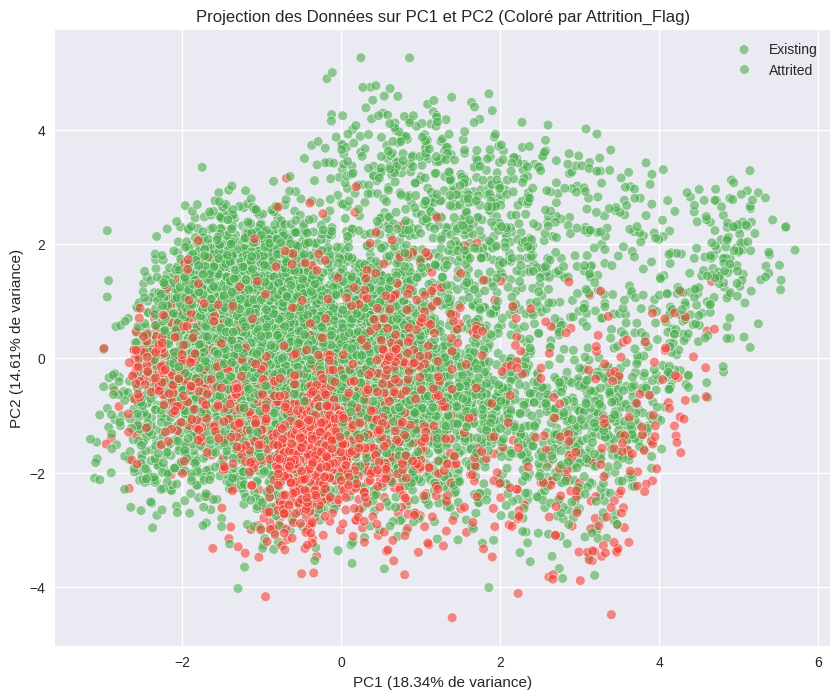

Scatter plot ACP PC1 vs PC2 sauvegardé sous 'pca_scatter_plot_pc1_pc2.png'.


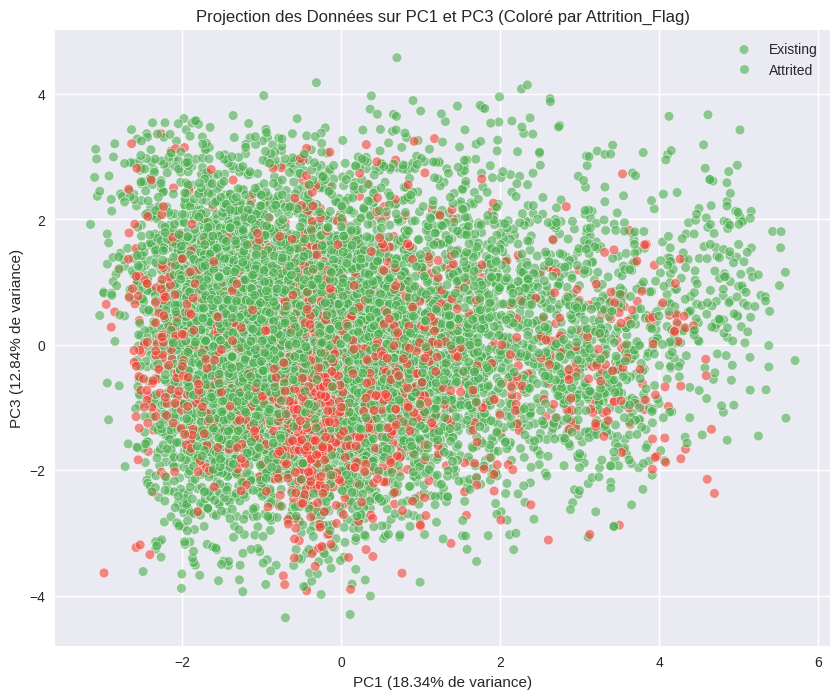

Scatter plot ACP PC1 vs PC3 sauvegardé sous 'pca_scatter_plot_pc1_pc3.png'.


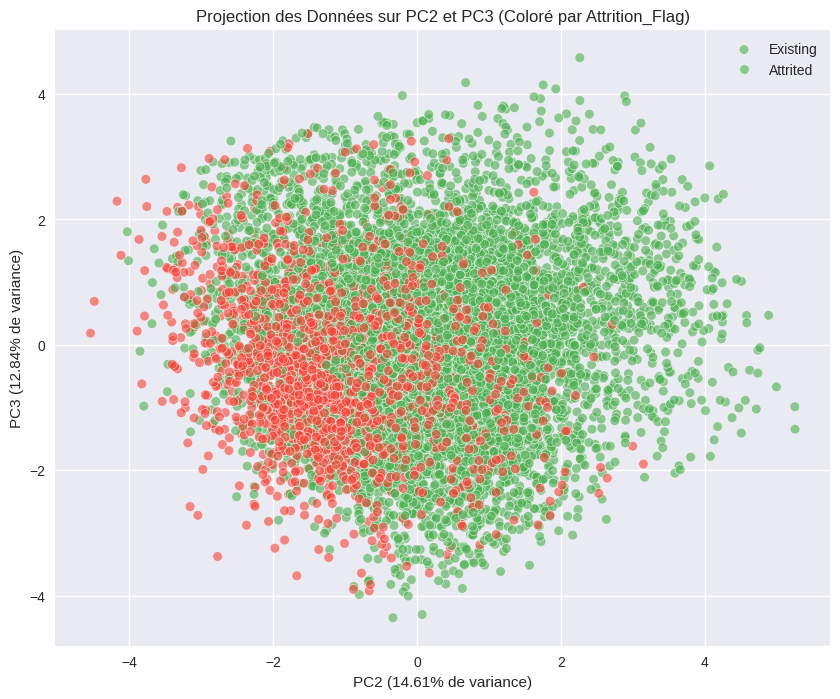

Scatter plot ACP PC2 vs PC3 sauvegardé sous 'pca_scatter_plot_pc2_pc3.png'.


In [ ]:
# Étape 4.7 : Visualiser les données projetées sur plusieurs paires de composantes
# Récupérer Attrition_Flag pour la coloration
attrition_flag = data.loc[data_acp.index, 'Attrition_Flag']

# Liste des paires de composantes à visualiser
pairs = [(0, 1), (0, 2), (1, 2)]  # (PC1 vs PC2), (PC1 vs PC3), (PC2 vs PC3)

for i, (pc_x, pc_y) in enumerate(pairs):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_pca[:, pc_x], y=X_pca[:, pc_y], hue=attrition_flag, palette=['#4CAF50', '#F44336'], alpha=0.6)
    plt.title(f'Projection des Données sur PC{pc_x+1} et PC{pc_y+1} (Coloré par Attrition_Flag)')
    plt.xlabel(f'PC{pc_x+1} ({explained_variance_ratio[pc_x]*100:.2f}% de variance)')
    plt.ylabel(f'PC{pc_y+1} ({explained_variance_ratio[pc_y]*100:.2f}% de variance)')
    plt.legend(['Existing', 'Attrited'])
    plt.grid(True)
    plt.savefig(path_images + f'pca_scatter_plot_pc{pc_x+1}_pc{pc_y+1}.png')
    plt.show()
    print(f"Scatter plot ACP PC{pc_x+1} vs PC{pc_y+1} sauvegardé sous 'pca_scatter_plot_pc{pc_x+1}_pc{pc_y+1}.png'.")

In [ ]:
# Étape 4.8 : Analyser les contributions des variables aux composantes
components_df = pd.DataFrame(pca.components_, columns=quantitative_cols, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("\nContributions des variables aux composantes principales :")
print(components_df)


Contributions des variables aux composantes principales :
      Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
PC1  -4.452987e-02     8.110147e-02   -3.594478e-02             -1.742687e-01   
PC2  -2.711993e-01     7.802177e-02   -2.687709e-01             -2.286993e-01   
PC3   6.297877e-01    -1.489170e-01    6.295503e-01             -1.706872e-01   
PC4   5.043407e-02    -3.923587e-02    4.813788e-02              2.814911e-01   
PC5  -4.222340e-02     1.327719e-01   -5.233439e-02             -3.889260e-03   
PC6   8.418862e-02     6.934351e-01    8.609172e-02              5.448623e-02   
PC7  -4.205374e-02     3.134137e-01   -1.053704e-02             -6.023780e-02   
PC8   1.059361e-01     5.878104e-01    1.242171e-01             -1.773170e-01   
PC9   3.117793e-02     1.042443e-01    5.035833e-02              8.653561e-01   
PC10 -2.205476e-02    -9.755215e-02   -5.413788e-02             -1.072793e-01   
PC11  9.783614e-02    -1.016686e-02   -8.577925e-0

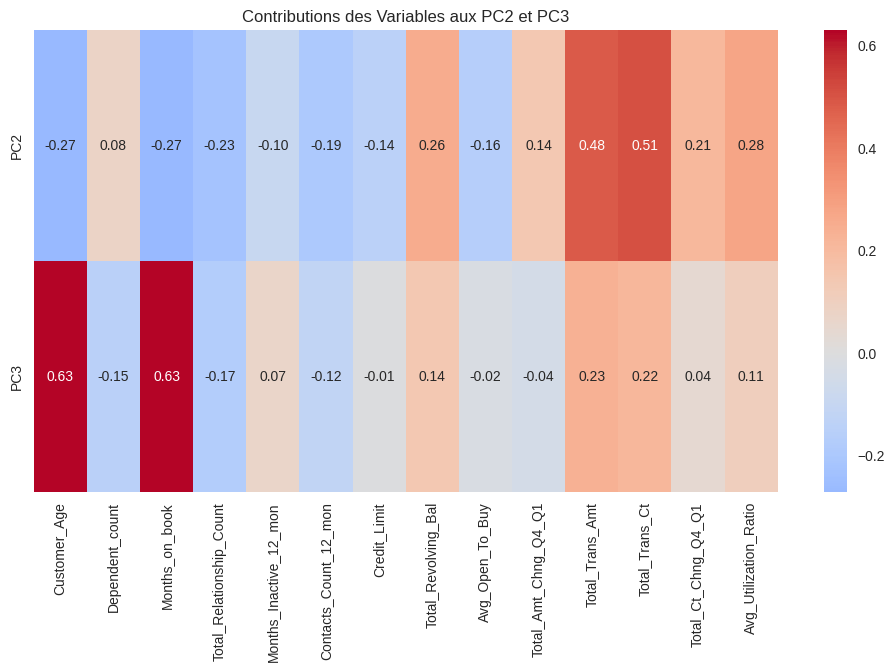

Heatmap des contributions sauvegardée sous 'pca_components_heatmap_pc2_pc3.png'.


In [ ]:
# Visualiser les contributions pour PC2 et PC3
plt.figure(figsize=(12, 6))
sns.heatmap(components_df.loc[['PC2', 'PC3']], annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Contributions des Variables aux PC2 et PC3')
plt.savefig(path_images+'pca_components_heatmap_pc2_pc3.png')
plt.show()
print("Heatmap des contributions sauvegardée sous 'pca_components_heatmap_pc2_pc3.png'.")

In [ ]:
# Étape 4.9 : Sauvegarder les résultats
var_cov_matrix_df.to_csv(path_data+'variance_covariance_matrix.csv')
pd.DataFrame(explained_variance_ratio, index=[f'PC{i+1}' for i in range(len(explained_variance_ratio))], columns=['Explained Variance Ratio']).to_csv(path_data+'pca_variance.csv')
pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]).to_csv(path_data+'pca_transformed_data.csv')
components_df.to_csv('pca_components.csv')

print("\nRésultats sauvegardés :")
print("- Matrice de variance-covariance : 'variance_covariance_matrix.csv'")
print("- Variance expliquée : 'pca_variance.csv'")
print("- Données transformées : 'pca_transformed_data.csv'")
print("- Contributions des variables : 'pca_components.csv'")
print("\nÉtape 4 terminée : Analyse en Composantes Principales effectuée avec succès !")


Résultats sauvegardés :
- Matrice de variance-covariance : 'variance_covariance_matrix.csv'
- Variance expliquée : 'pca_variance.csv'
- Données transformées : 'pca_transformed_data.csv'
- Contributions des variables : 'pca_components.csv'

Étape 4 terminée : Analyse en Composantes Principales effectuée avec succès !


In [ ]:
# Etape 5 : Clustering
#On utilise les 8 premières composantes de l’ACP (80% de la variance expliquée) comme base du clustering
# Garde les 8 premières composantes de l'ACP
X_pca_selected = X_pca[:, :8]



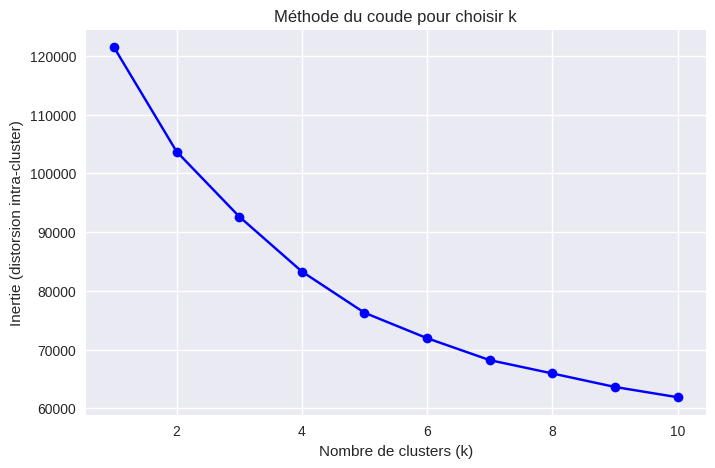

In [ ]:
# 5.1. Déterminer le bon nombre de clusters K (K-means)

# a. Méthode du coude (Elbow method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (distorsion intra-cluster)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()


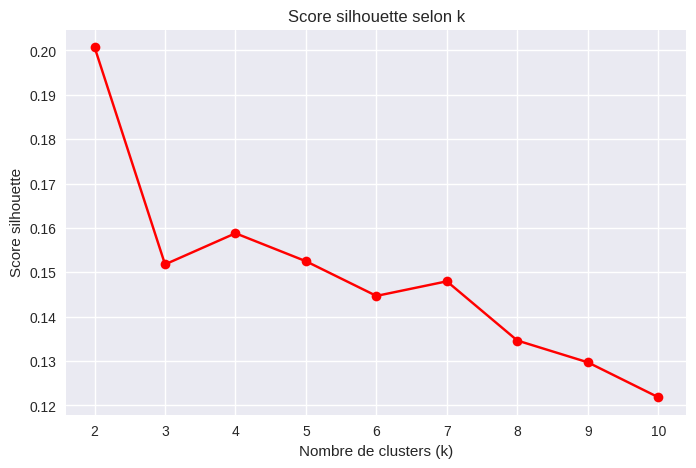

In [ ]:
# b. Méthode du score silhouette
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_selected)
    score = silhouette_score(X_pca_selected, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score silhouette')
plt.title('Score silhouette selon k')
plt.grid(True)
plt.show()


In [ ]:
# 5.2 Appliquer le K-Means final
k = 2  # Choisi selon analyse
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca_selected)


In [ ]:
# 5.3 DBSCAN (clusters non sphériques)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN est sensible à l'échelle
X_dbscan = StandardScaler().fit_transform(X_pca_selected)

dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_dbscan)


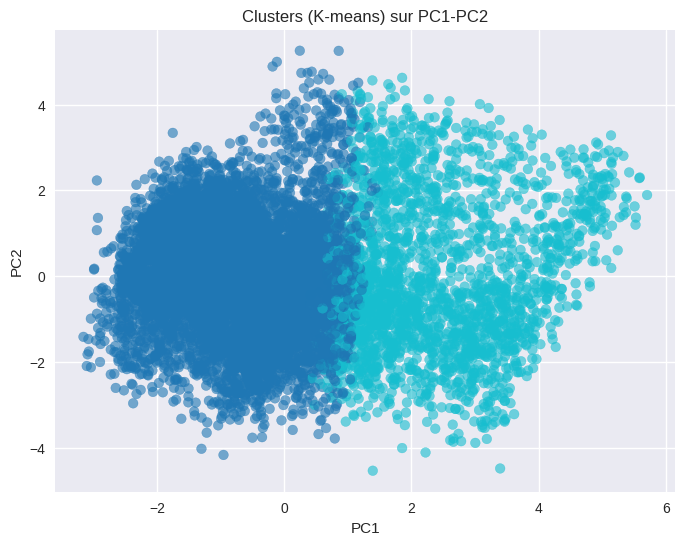

In [ ]:
#  5.4 Visualisation des clusters (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters (K-means) sur PC1-PC2')
plt.grid(True)
plt.show()


In [ ]:
#  5.5 Profilage des clusters
df_clusters = data.copy() # Replace 'df' with 'data'
df_clusters['cluster'] = clusters_kmeans

# Analyse des profils
cluster_profiles = df_clusters.groupby('cluster')[quantitative_cols].mean()
display(cluster_profiles)

Customer_Age  Dependent_count  Months_on_book  \
cluster                                                  
0           46.391800         2.306726       35.958360   
1           46.104651         2.478898       35.827735   

         Total_Relationship_Count  Months_Inactive_12_mon  \
cluster                                                     
0                        3.946957                2.356054   
1                        3.360896                2.291128   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
cluster                                                             
0                     2.463165   4562.302511          1169.725689   
1                     2.428941  22311.379845          1139.581826   

         Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
cluster                                                           
0            3392.576823              0.757017      3714.794491   
1           21171.798019              0.769767      6721.021102   

         Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
cluster                                                              
0             61.726714             0.710471               0.338398  
1             75.386305             0.718110               0.061435

In [ ]:
pd.crosstab(df_clusters['cluster'], df_clusters['Attrition_Flag'], normalize='index')


Attrition_Flag         0         1
cluster                           
0               0.829468  0.170532
1               0.872524  0.127476

In [ ]:
# 6 : Modélisation Supervisée
# 6.1 Préparation des données
from sklearn.model_selection import train_test_split

# Cible binaire : 1 = client perdu (Attrited), 0 = client existant
df_model = df_clusters.copy()
df_model['Churn'] = df_model['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

X = df_model[quantitative_cols]
y = df_model['Churn']

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# 6 : Modélisation Supervisée
# 6.1 Préparation des données
from sklearn.model_selection import train_test_split

# Cible binaire : 1 = client perdu (Attrited), 0 = client existant
df_model = df_clusters.copy()
# Fixed the condition for 'Attrited Customer'
df_model['Churn'] = df_model['Attrition_Flag'].apply(lambda x: 1 if x == 1 else 0)

X = df_model[quantitative_cols]
y = df_model['Churn']

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


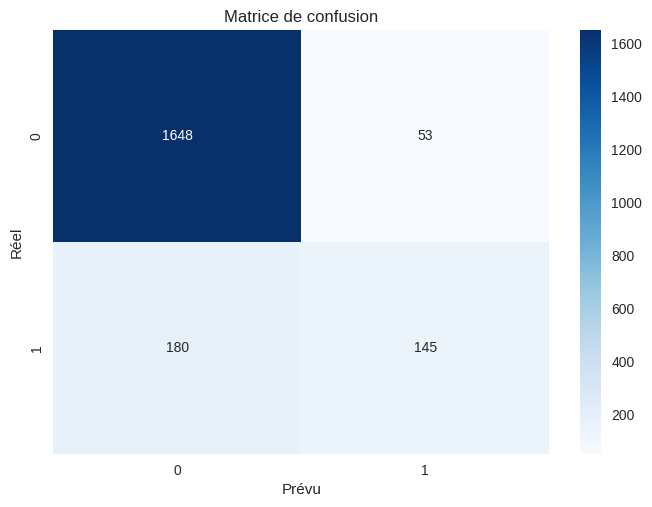


Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.45      0.55       325

    accuracy                           0.88      2026
   macro avg       0.82      0.71      0.74      2026
weighted avg       0.87      0.88      0.87      2026

AUC : 0.8791009813232036


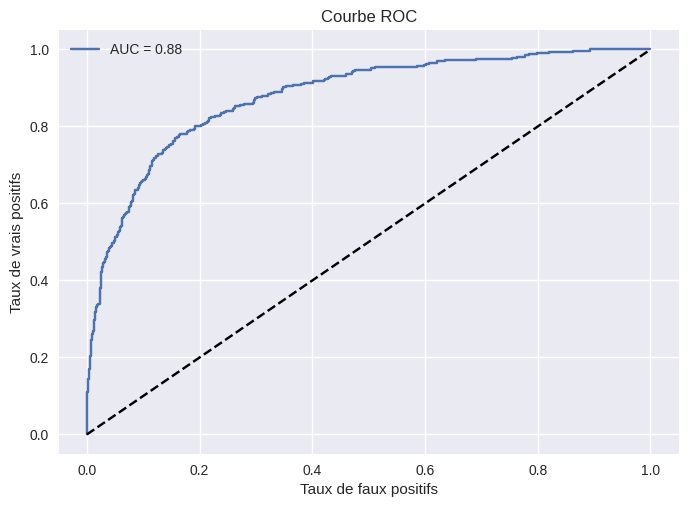

In [ ]:
# 6.2 Évaluation du modèle
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Initialize LogisticRegression
logreg = LogisticRegression(random_state=42) # You may need to adjust parameters


# Assuming 'logreg' is your LogisticRegression object
# You need to fit the model before making predictions
logreg.fit(X_train, y_train) # This line is crucial

# Prédiction
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prévu")
plt.ylabel("Réel")
plt.show()

# Rapport complet
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("AUC :", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbe ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.show()

In [ ]:
# 6.3 Test de modèles alternatifs
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("AUC RF:", roc_auc_score(y_test, y_prob_rf))

# XGBoost
xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("AUC XGB:", roc_auc_score(y_test, y_prob_xgb))


Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.76      0.84       325

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

AUC RF: 0.9878478722923167
XGBoost:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.89      0.89      0.89       325

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

AUC XGB: 0.9920951476507032


In [ ]:
# 6.4 selection des variable
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)
print(scores)


                     Feature        Score
11            Total_Trans_Ct  1304.840615
12       Total_Ct_Chng_Q4_Q1   724.081801
7        Total_Revolving_Bal   624.638229
5      Contacts_Count_12_mon   357.053749
13     Avg_Utilization_Ratio   298.439252
10           Total_Trans_Amt   251.300721
4     Months_Inactive_12_mon   207.190324
3   Total_Relationship_Count   204.922922
9       Total_Amt_Chng_Q4_Q1   137.395987
1            Dependent_count     7.760686
6               Credit_Limit     4.658394
0               Customer_Age     2.412416
2             Months_on_book     0.534546
8            Avg_Open_To_Buy     0.000211


In [ ]:
# 6.5 Ajustement du seuil de décision
import numpy as np
from sklearn.metrics import confusion_matrix

# Par exemple avec XGBoost :
custom_threshold = 0.35
y_pred_thresh = (y_prob_xgb >= custom_threshold).astype(int)

print("Avec seuil 0.35 :")
print(classification_report(y_test, y_pred_thresh))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_thresh))


Avec seuil 0.35 :
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1701
           1       0.87      0.91      0.89       325

    accuracy                           0.96      2026
   macro avg       0.92      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Matrice de confusion :
[[1655   46]
 [  29  296]]


In [ ]:
# 6.6 Identifier les faux négatifs
false_negatives = (y_test == 1) & (y_pred_xgb == 0)
X_false_neg = X_test[false_negatives]

# Afficher des statistiques descriptives
print("Analyse des faux négatifs :")
print(X_false_neg.describe())


Analyse des faux négatifs :
       Customer_Age  Dependent_count  Months_on_book  \
count     36.000000        36.000000       36.000000   
mean      46.472222         2.111111       37.000000   
std       10.776923         1.409717       10.725137   
min       27.000000         0.000000       16.000000   
25%       40.000000         1.000000       31.000000   
50%       48.500000         2.000000       36.000000   
75%       52.500000         3.000000       41.250000   
max       65.000000         4.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                 36.000000               36.000000   
mean                   4.111111                2.250000   
std                    1.429841                1.250714   
min                    2.000000                0.000000   
25%                    3.000000                1.000000   
50%                    4.000000                2.000000   
75%                    5.250000                3.00000

In [ ]:
# 6.7. Interprétation des coefficients
coeffs = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\nCoefficients de la régression logistique :")
display(coeffs)



Coefficients de la régression logistique :


Contacts_Count_12_mon       0.435830
Months_Inactive_12_mon      0.354495
Total_Relationship_Count   -0.314476
Dependent_count             0.276272
Total_Ct_Chng_Q4_Q1        -0.087085
Total_Trans_Ct             -0.077457
Customer_Age                0.055148
Months_on_book             -0.033125
Total_Amt_Chng_Q4_Q1       -0.020320
Total_Revolving_Bal        -0.000602
Total_Trans_Amt             0.000322
Credit_Limit               -0.000317
Avg_Open_To_Buy             0.000285
Avg_Utilization_Ratio       0.000080
dtype: float64

Interprétation :

Les coefficients indiquent l’influence de chaque variable sur la probabilité de churn.

Coefficients > 0 ➝ augmentent le risque de churn.

Coefficients < 0 ➝ réduisent le risque de churn.



In [ ]:
# 7 Simulation de Monte Carlo

# 7.1  1. Objectif de la simulation Monte Carlo
#On génère plusieurs jeux de données légèrement perturbés à partir du jeu de test (ou validation), on fait des prédictions à chaque fois, puis on analyse la distribution des prédictions.

#Cela permet de :

#Tester la robustesse du modèle.

# Identifier l'incertitude sur les prédictions.

#Estimer un intervalle de confiance pour le taux de churn prévu.



In [ ]:
# 7.2 simulation Monte Carlo
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

n_simulations = 1000  # nombre de scénarios
predicted_churn_rates = []

# Simulation de Monte Carlo : bruit aléatoire sur les données
for _ in tqdm(range(n_simulations)):
    # Perturbation aléatoire (gaussienne) des données d'entrée
    X_test_perturbed = X_test + np.random.normal(loc=0, scale=0.02, size=X_test.shape)

    # Prédictions sur ce scénario
    y_prob_sim = logreg.predict_proba(X_test_perturbed)[:, 1]

    # Taux de churn moyen prédit dans cette simulation
    churn_rate = y_prob_sim.mean()
    predicted_churn_rates.append(churn_rate)


100%|██████████| 1000/1000 [00:02<00:00, 337.65it/s]


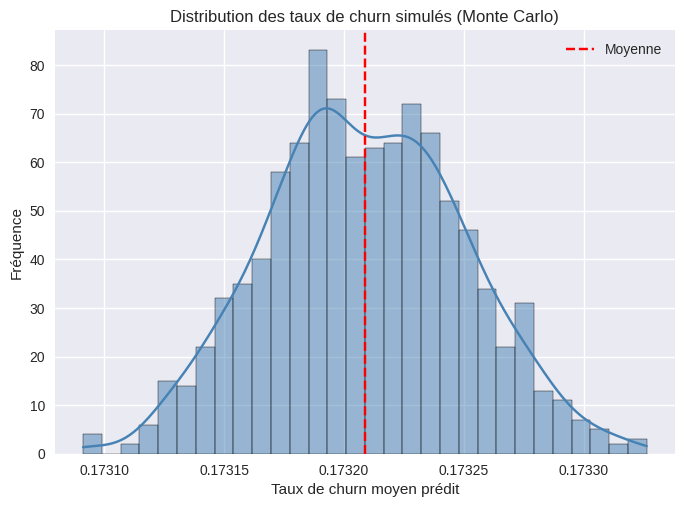


Intervalle de confiance à 95% du taux de churn prévu : [0.173, 0.173]
Moyenne des taux simulés : 0.173


In [ ]:
# 7.3 Visualisation et intervalle de confiance
import seaborn as sns

# Histogramme des taux de churn simulés
sns.histplot(predicted_churn_rates, kde=True, bins=30, color='steelblue')
plt.axvline(np.mean(predicted_churn_rates), color='red', linestyle='--', label='Moyenne')
plt.title("Distribution des taux de churn simulés (Monte Carlo)")
plt.xlabel("Taux de churn moyen prédit")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# Intervalle de confiance à 95%
lower_bound = np.percentile(predicted_churn_rates, 2.5)
upper_bound = np.percentile(predicted_churn_rates, 97.5)

print(f"\nIntervalle de confiance à 95% du taux de churn prévu : [{lower_bound:.3f}, {upper_bound:.3f}]")
print(f"Moyenne des taux simulés : {np.mean(predicted_churn_rates):.3f}")


 Interprétation
Histogramme : montre la variabilité du taux de churn prédit selon les perturbations des données.

Intervalle de confiance 95% : indique dans quelle fourchette se situe généralement le taux de churn estimé, malgré les incertitudes.

Si l’intervalle est étroit ➝ modèle robuste ; sinon, il est sensible aux perturbations.



## PARTIE 2 : Résultats & Déploiement##

In [ ]:
#  1. KPIs : Indicateurs clés ---

# Taux de churn global
# Replace 'df' with 'data' or 'data_encoded' or the correct DataFrame name
churn_rate = data['Attrition_Flag'].value_counts(normalize=True)[1]  # Assuming 'Attrited Customer' is encoded as 1
print(f"\nTaux de churn global : {churn_rate:.2%}")


Taux de churn global : 16.07%


In [ ]:
# Utilisation moyenne du crédit
avg_utilization = data['Avg_Utilization_Ratio'].mean()  # Replace 'df' with 'data'
print(f"Utilisation moyenne du crédit : {avg_utilization:.2f}")

Utilisation moyenne du crédit : 0.27


In [ ]:
# Montant moyen des transactions
avg_trans_amt = data['Total_Trans_Amt'].mean()  # Replace 'df' with 'data'
print(f"Montant moyen des transactions : {avg_trans_amt:.2f}")

Montant moyen des transactions : 4404.09


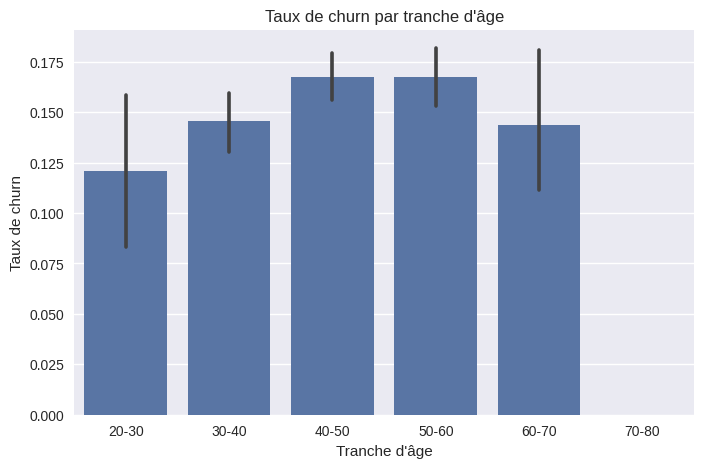

In [ ]:
# Bar chart - Churn par tranche d'âge
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported

# Créer des tranches d'âge
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['age_group'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels) # Replace 'df' with 'data'

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='Attrition_Flag', data=data.replace({'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1}})) # Replace 'df' with 'data'
plt.title("Taux de churn par tranche d'âge")
plt.ylabel("Taux de churn")
plt.xlabel("Tranche d'âge")
plt.show()

In [ ]:
# 2. Affinage des modèles ---

# LASSO pour sélection de variables
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5).fit(X_scaled, y)
coef = pd.Series(lasso.coef_, index=X.columns)
important_vars = coef[coef != 0].index.tolist()
print("\nVariables retenues par Lasso :")
print(important_vars)



Variables retenues par Lasso :
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
# VIF : multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVIF des variables :")
print(vif_data.sort_values(by="VIF", ascending=False))



VIF des variables :
                     feature       VIF
7        Total_Revolving_Bal       inf
6               Credit_Limit       inf
8            Avg_Open_To_Buy       inf
10           Total_Trans_Amt  3.263320
11            Total_Trans_Ct  3.024481
13     Avg_Utilization_Ratio  2.900014
0               Customer_Age  2.675596
2             Months_on_book  2.658376
12       Total_Ct_Chng_Q4_Q1  1.208277
9       Total_Amt_Chng_Q4_Q1  1.192111
3   Total_Relationship_Count  1.155622
5      Contacts_Count_12_mon  1.037201
1            Dependent_count  1.028368
4     Months_Inactive_12_mon  1.011255


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# AIC / BIC comparaison
import statsmodels.api as sm

X_const = sm.add_constant(X[important_vars])
logit_model = sm.Logit(y, X_const)
result = logit_model.fit(disp=0)
print("\nAIC :", result.aic)
print("BIC :", result.bic)


AIC : 4902.556943713193
BIC : 5003.678389359845


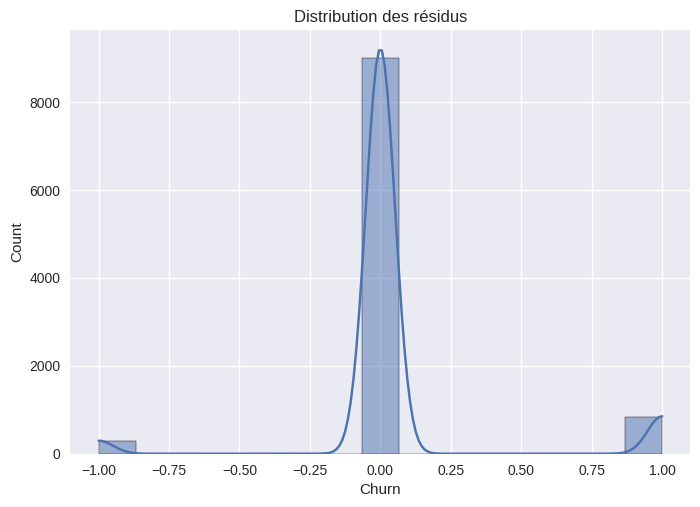

In [ ]:
# Analyse des résidus
residuals = y - logreg.predict(X)
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.show()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted 

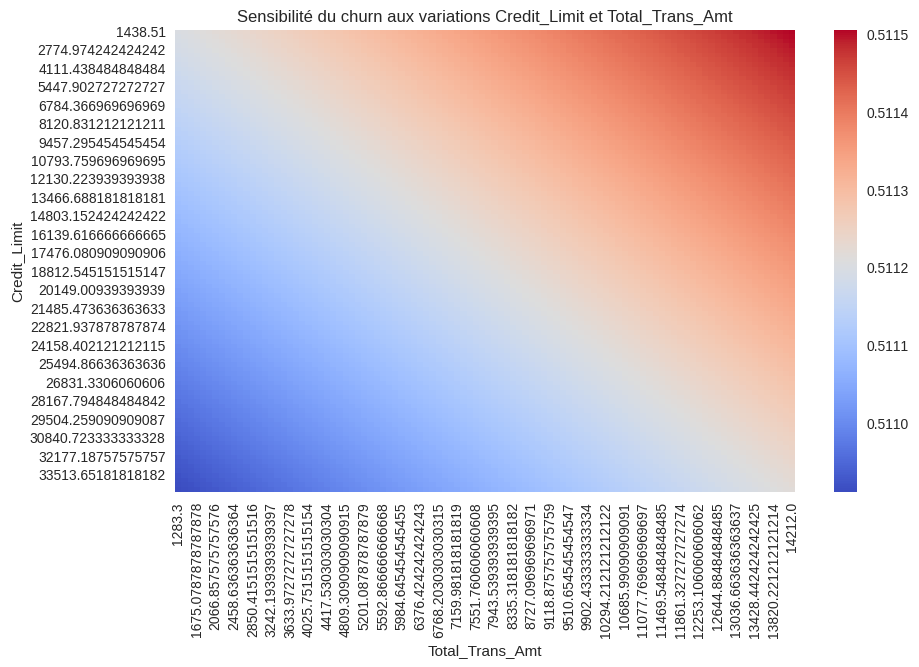

In [ ]:
# 3. Monte Carlo Avancé ---

# Variation du Credit_Limit et Total_Trans_Amt
# Replace 'df' with 'X' in the following lines:
credit_vals = np.linspace(X['Credit_Limit'].quantile(0.05), X['Credit_Limit'].quantile(0.95), 100)
trans_vals = np.linspace(X['Total_Trans_Amt'].quantile(0.05), X['Total_Trans_Amt'].quantile(0.95), 100)

churn_predictions = []
for cl in credit_vals:
    for tt in trans_vals:
        sample = X[X.columns].mean().copy()  # Also replace 'df' with 'X' here
        sample['Credit_Limit'] = cl
        sample['Total_Trans_Amt'] = tt
        sample_scaled = scaler.transform([sample])
        prob = logreg.predict_proba(sample_scaled)[0,1]
        churn_predictions.append((cl, tt, prob))

# Affichage en graphique de sensibilité
montecarlo_df = pd.DataFrame(churn_predictions, columns=['Credit_Limit', 'Total_Trans_Amt', 'Churn_Prob'])

pivot_table = montecarlo_df.pivot(index="Credit_Limit", columns="Total_Trans_Amt", values="Churn_Prob")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm")
plt.title("Sensibilité du churn aux variations Credit_Limit et Total_Trans_Amt")
plt.show()

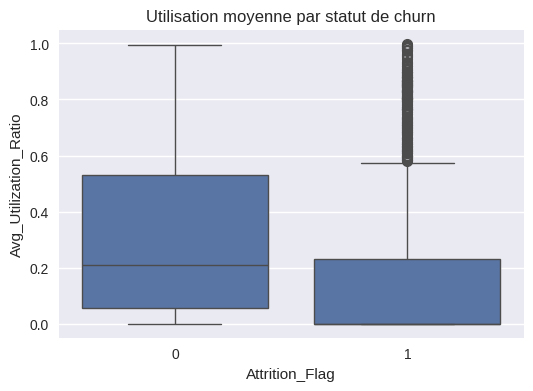

In [ ]:
# 4. Rapport Final (récap + visuels) ---

# Insight visuel - ROC déjà fait dans partie précédente
# Ici on peut rappeler : Utilisation > 0.5 = moins de churn
plt.figure(figsize=(6,4))
# Replace 'df' with 'data' which is your DataFrame:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=data)
plt.title("Utilisation moyenne par statut de churn")
plt.show()

In [ ]:
#  5. Déploiement (base technique) ---

# Rapport interactif sur Streamlit ou Gradio possible
# Exemple de pipeline automatisé (simplifié)
def pipeline_model(data):
    data_clean = preprocessing(data)  # nettoyage
    X_data = data_clean[X.columns]
    X_scaled_data = scaler.transform(X_data)
    predictions = logreg.predict_proba(X_scaled_data)[:, 1]
    return predictions

print("\nPipeline prêt à être intégré dans une app (Streamlit, Gradio, etc.)")



Pipeline prêt à être intégré dans une app (Streamlit, Gradio, etc.)
